# Titanic- Machine Learning from Disaster

In [122]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

%matplotlib inline
sns.set(color_codes=True)

In [123]:
test = pd.read_csv('/Users/mehmetkizilaslan/Desktop/titanic/test.csv')
train = pd.read_csv('/Users/mehmetkizilaslan/Desktop/titanic/train.csv')
gender = pd.read_csv('/Users/mehmetkizilaslan/Desktop/titanic/gender_submission.csv')

In [124]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [125]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [129]:
gender.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [130]:
len(test)

418

In [131]:
len(train)

891

In [132]:
len(gender)

418

In [133]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [134]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [135]:
print(gender.isnull().sum())

PassengerId    0
Survived       0
dtype: int64


<AxesSubplot:>

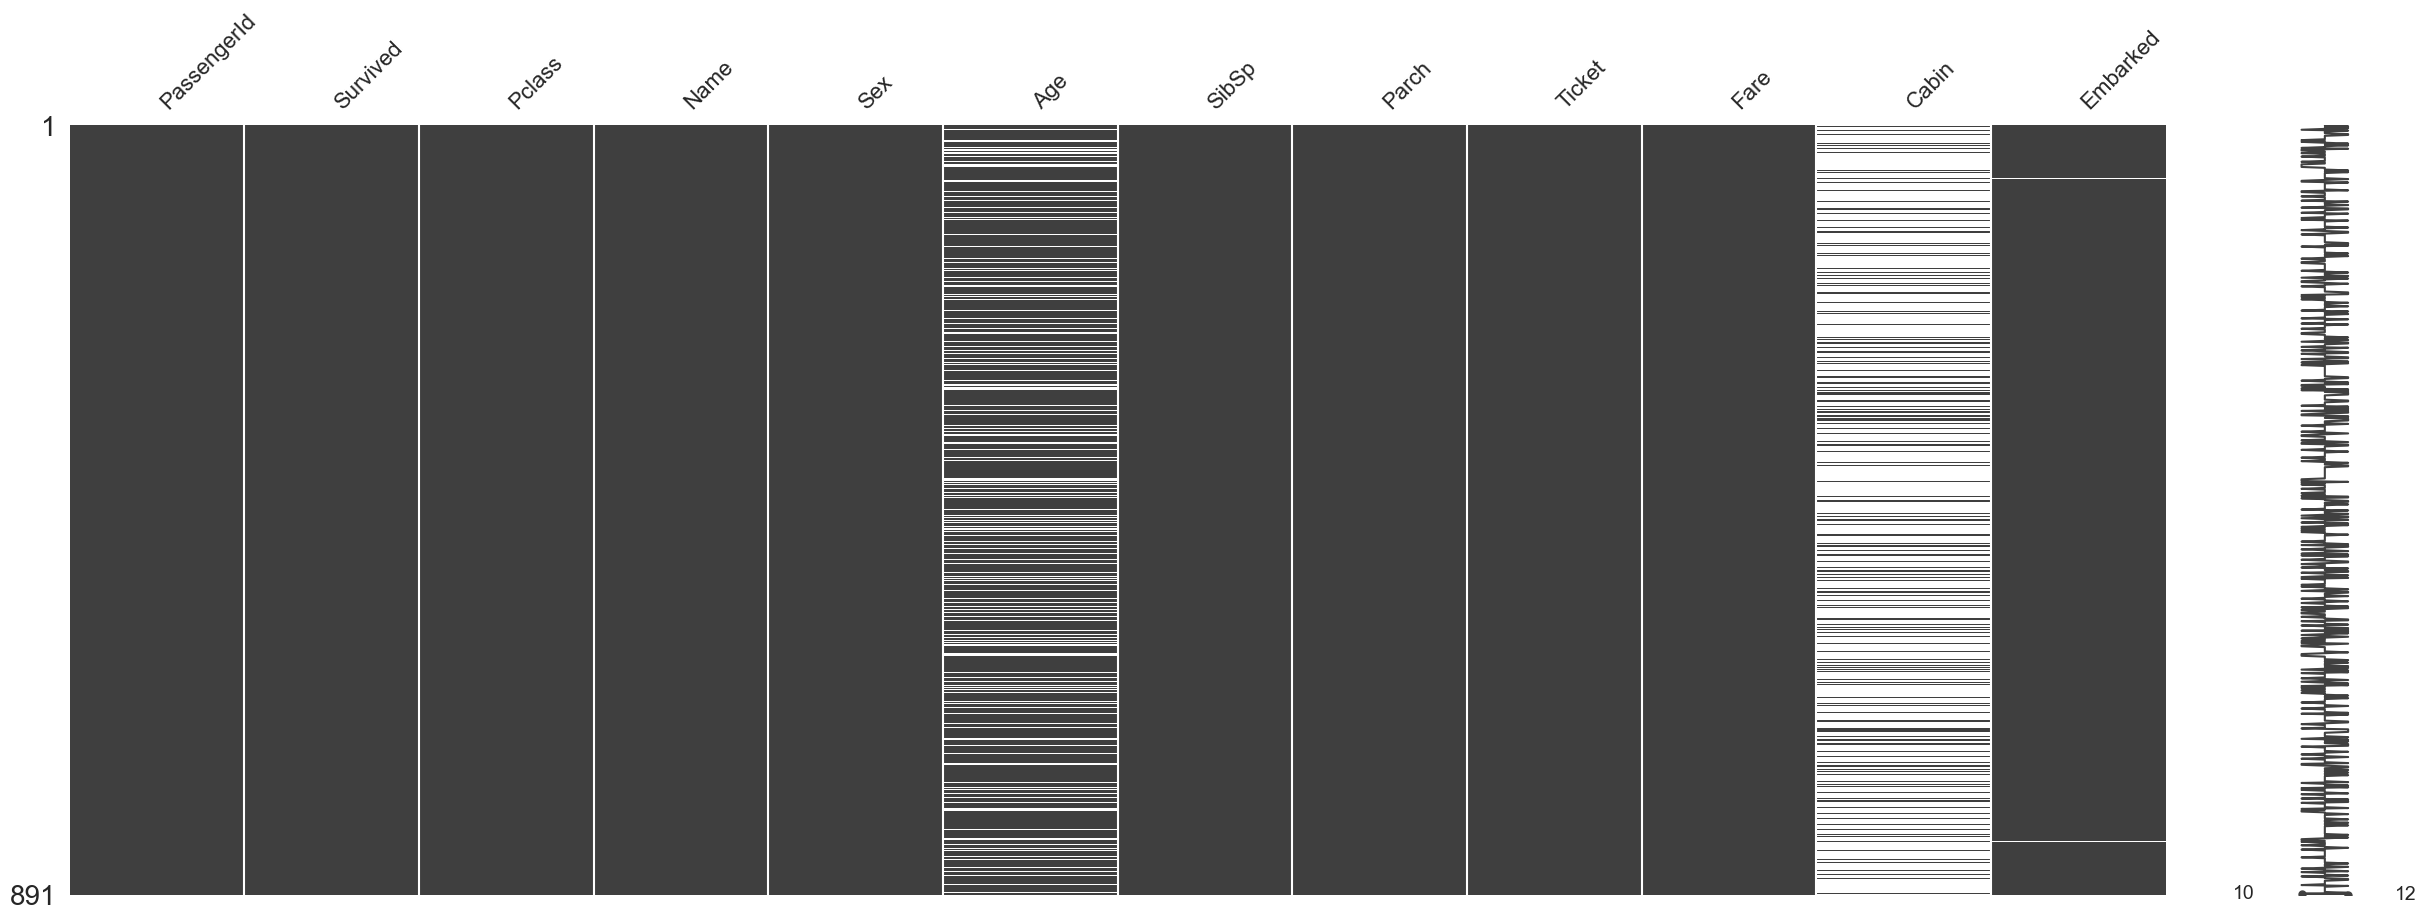

In [136]:
missingno.matrix(train, figsize=(30,10))

In [137]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 ### A new dataset to make modifications on the original train dataset

In [138]:
train_updated = pd.DataFrame() 

In [139]:
test_updated = pd.DataFrame()

##  Feature-1: Survived 
0: Did not survive 

1: Survived

0    549
1    342
Name: Survived, dtype: int64


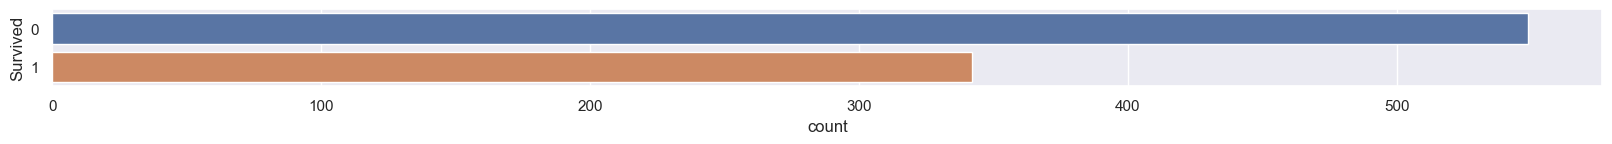

In [140]:
fig= plt.figure(figsize = (20,1))
sns.countplot( y='Survived', data=train);
print(train.Survived.value_counts())

In [141]:
train_updated['Survived'] = train['Survived']

## Feature-2: Pclass
### Passenger ticket classes:
1: 1st class

2: 2nd class

3: 3rd class

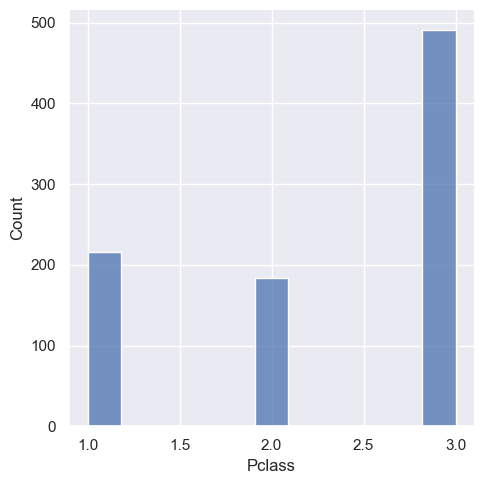

In [142]:
sns.displot(train.Pclass)

In [143]:
train_updated['Pclass'] = train['Pclass']

In [144]:
test_updated['Pclass'] = test['Pclass']

## Feature-3: Name

Name of the Titanic Passengers

In [145]:
train.Name.value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

#### all unique 891 passengers.

## Feature-4: Sex
Male, Female

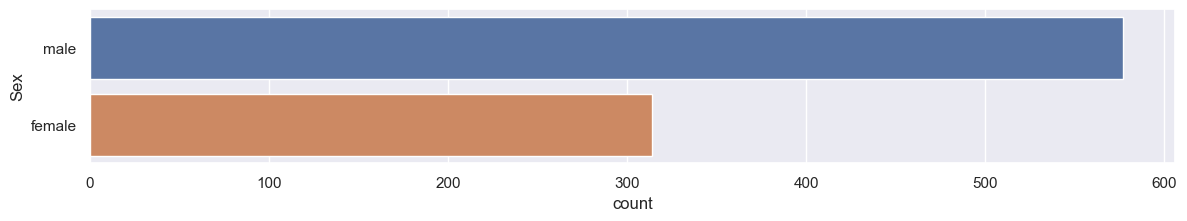

In [146]:
plt.figure(figsize = (14,2))
sns.countplot(y ='Sex' , data = train);

In [147]:
train.Sex.isnull().sum()

0

In [148]:
train_updated['Sex'] = train['Sex']
train_updated['Sex'] = np.where(train_updated['Sex'] == 'female', 1, 0)

In [149]:
test_updated['Sex'] = train['Sex']
test_updated['Sex'] = np.where(test_updated['Sex'] == 'female', 1, 0)

## Feature-5: Age

Age of the Titanic passengers in years

In [150]:
train.Age.isnull().sum()

177

#### 177 missing Age values in the train data set.

In [151]:
train_updated['Age'] = train['Age']
train_updated['Age'] = train_updated['Age'].fillna(train_updated['Age'].median())

In [152]:
test_updated['Age'] = test['Age']
test_updated['Age'] = test_updated['Age'].fillna(test_updated['Age'].median())

#### Median of the Age feature used for filling the 177 missing Age values.

In [153]:
train_updated.Age.isnull().sum()

0

## Feature-6: SibSp

The number of siblings/spouses the passenger has aboard the Titanic.

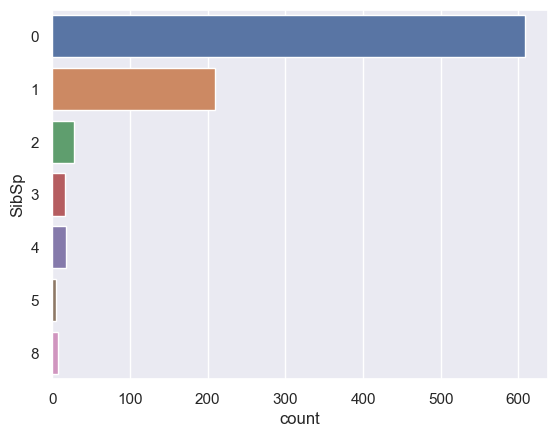

In [154]:
sns.countplot(y="SibSp", data=train);

In [155]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [156]:
train_updated['SibSp'] = train['SibSp']

In [157]:
test_updated['SibSp'] = test['SibSp']

## Feature-7: Parch

The number of parents/children the passenger has aboard the Titanic.

In [158]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [159]:
train_updated['Parch'] = train['Parch']

In [160]:
test_updated['Parch'] = test['Parch']

## Feature-8: Ticket

 The ticket number of the boarding passenger.

In [161]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## Feature-9: Fare

The price of the tickets.



In [162]:
train_updated['Fare'] = train['Fare'] 

In [163]:
test_updated['Fare'] = test['Fare'] 

In [164]:
test_updated['Fare'] = test_updated['Fare'].fillna(test_updated['Fare'].median())

In [165]:
test_updated['Fare'].isnull().sum()

0

In [166]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

## Feature-10: Cabin

The cabin number where the passenger was staying.

In [167]:
train.Cabin.isnull().sum()

687

In [168]:
train.shape

(891, 12)

#### 687 missing Cabin values out of 891 data rows. We won't include the Cabin feature in our ML training.

## Feature-11: Embarked

The port where the passenger boarded the Titanic.

In [169]:
train.Embarked.isnull().sum()

2

In [170]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

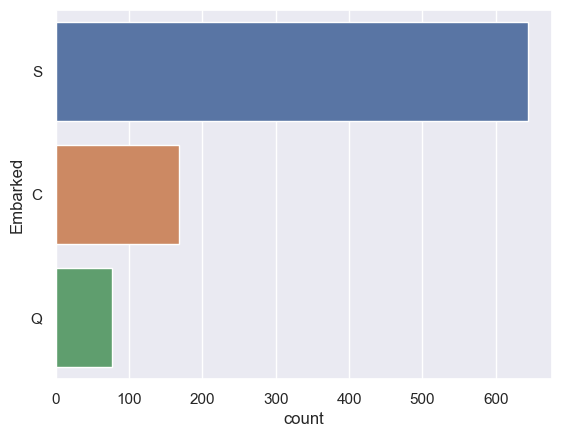

In [171]:
sns.countplot(y='Embarked', data=train);

In [172]:
train_updated['Embarked'] = train['Embarked']
print(len(train_updated))
train_updated = train_updated.dropna(subset=['Embarked'])
print(len(train_updated))

891
889


#### 2 missing values dropped from train_updated dataframe

In [173]:
test_updated['Embarked'] = test['Embarked']

In [174]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### We wont be using PassengerID, Name, Ticket, Cabin features.

## The last check for train_updated dataset before running ML algorithims

<AxesSubplot:>

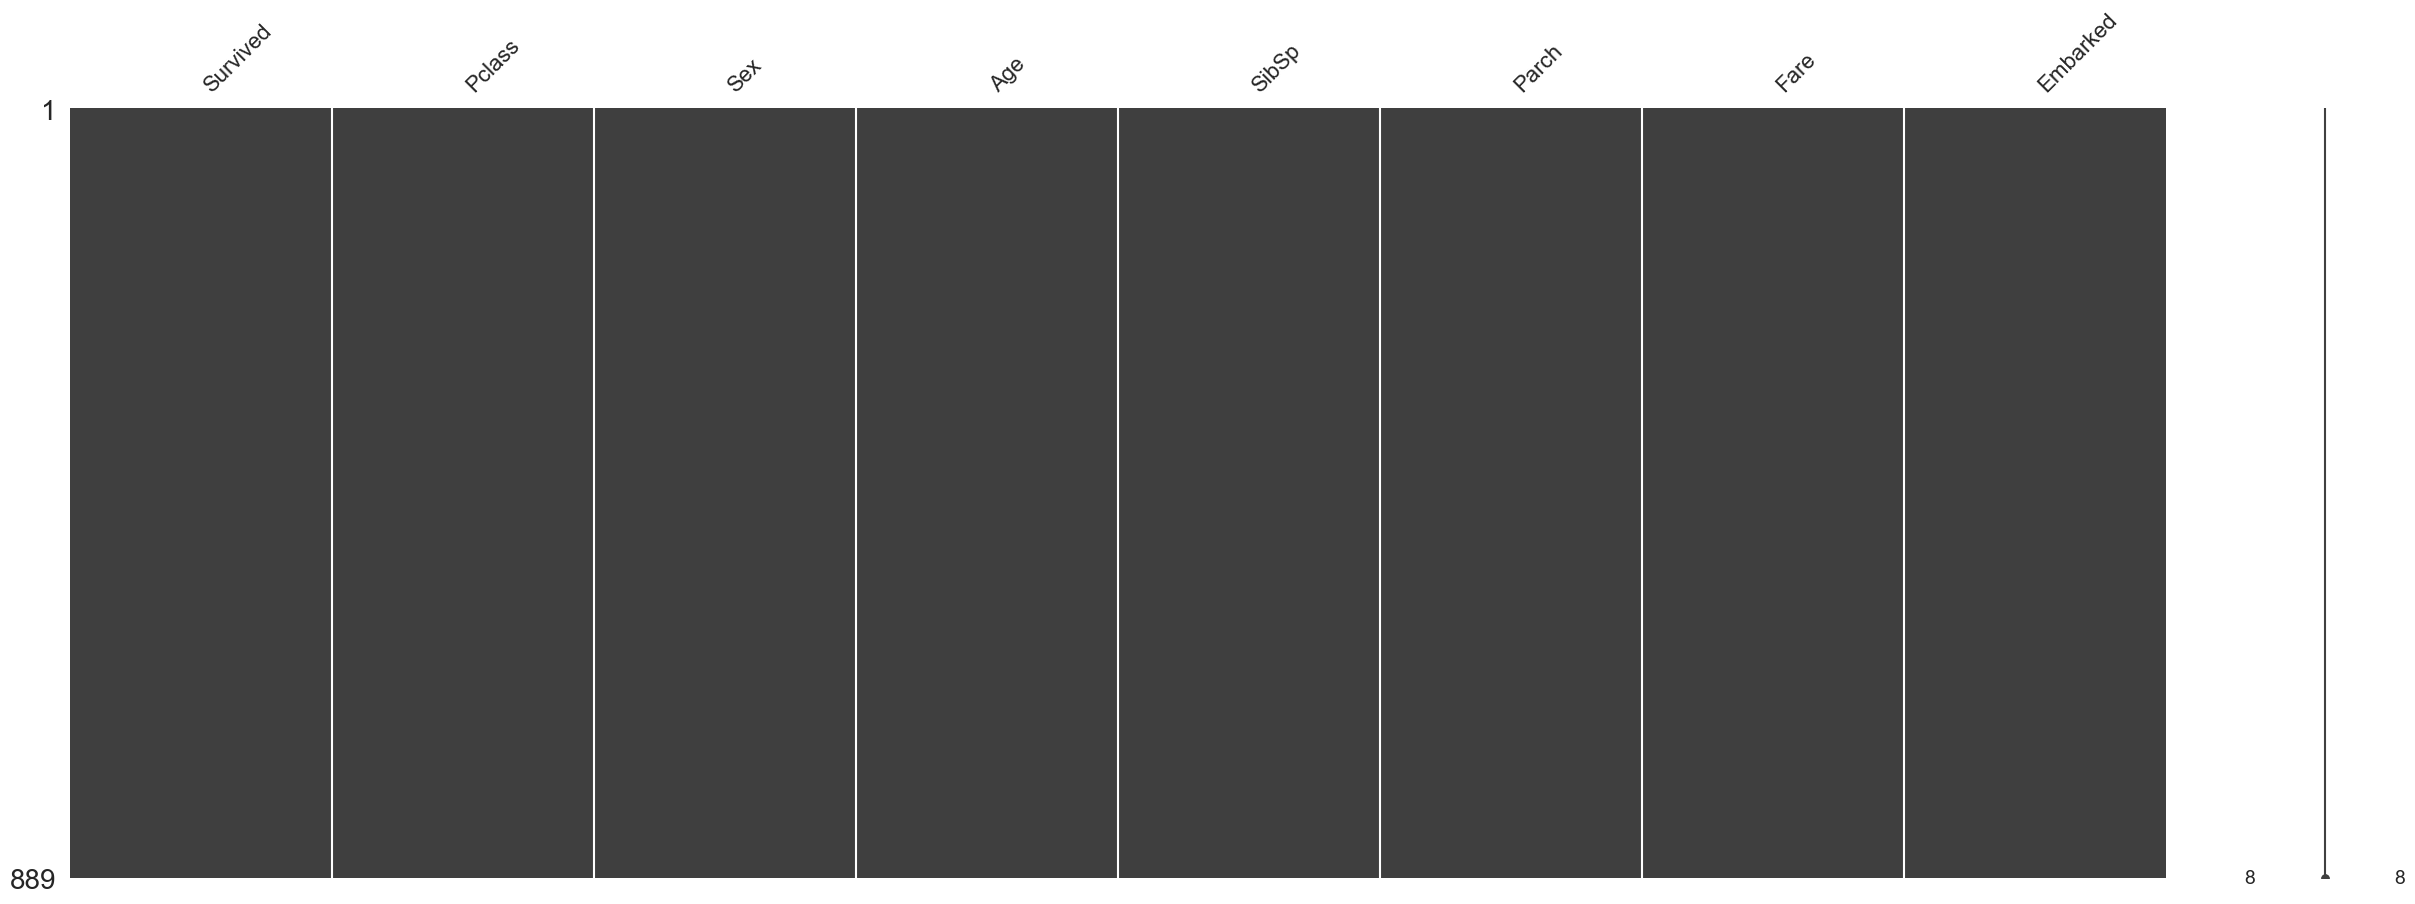

In [175]:
missingno.matrix(train_updated, figsize=(30,10))

In [176]:
train_updated.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
5,0,3,0,28.0,0,0,8.4583,Q
6,0,1,0,54.0,0,0,51.8625,S
7,0,3,0,2.0,3,1,21.0750,S
8,1,3,1,27.0,0,2,11.1333,S
9,1,2,1,14.0,1,0,30.0708,C


In [177]:
train_updated.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [178]:
df_num = train_updated[['Age','SibSp','Parch','Fare']]
df_cat = train_updated[['Survived','Pclass','Sex','Embarked']]

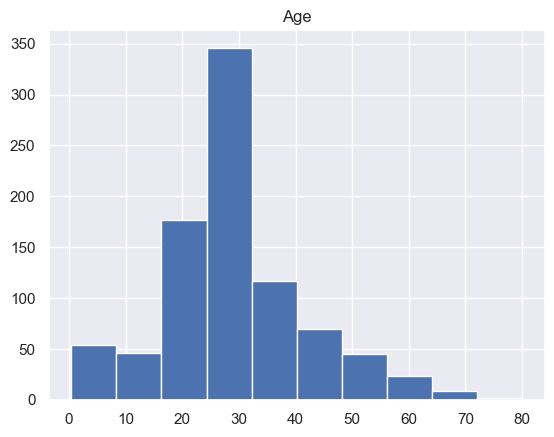

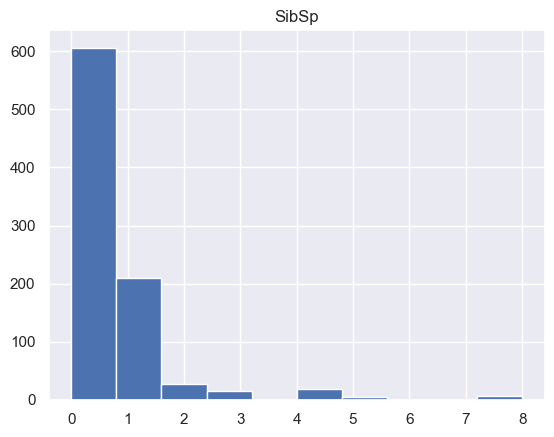

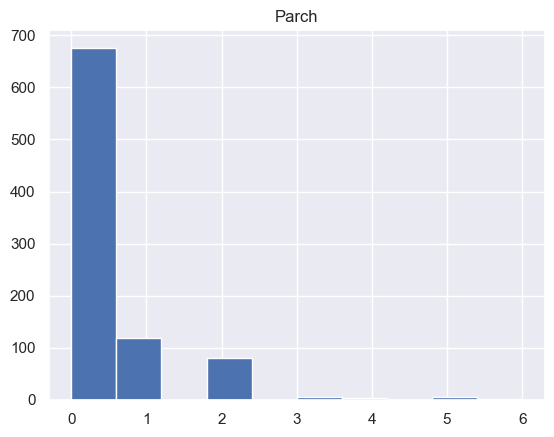

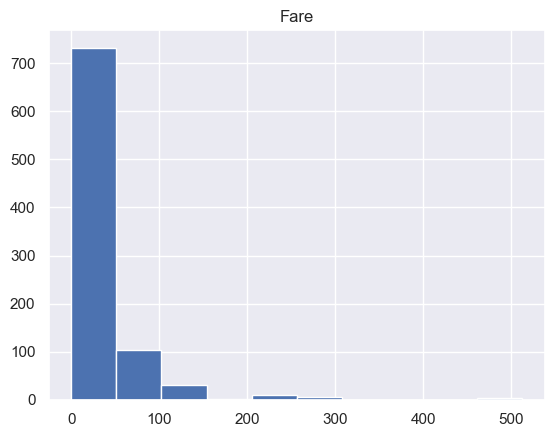

In [179]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


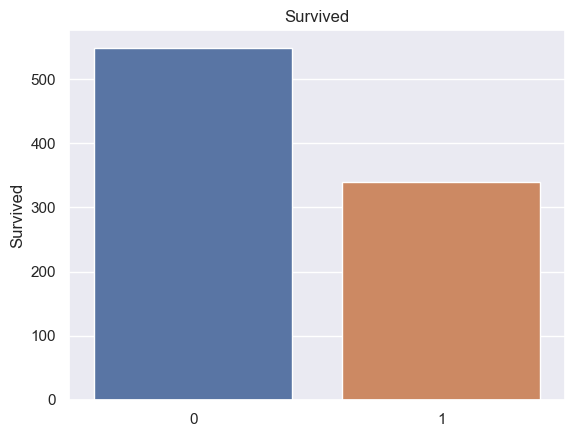

/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


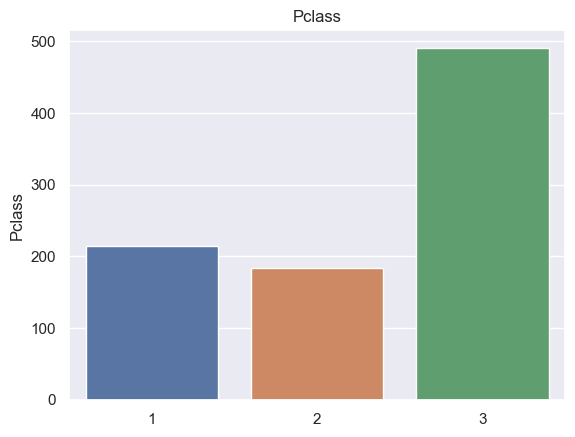

/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


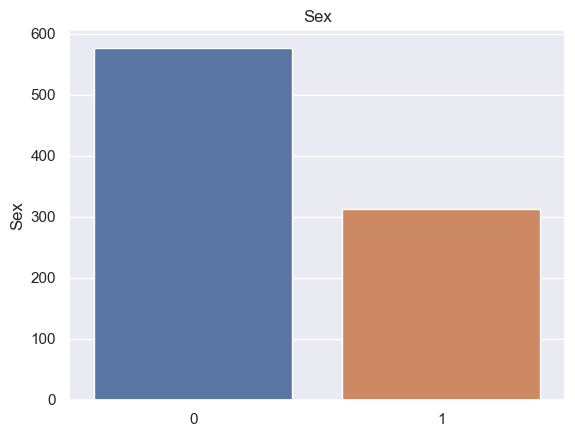

/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


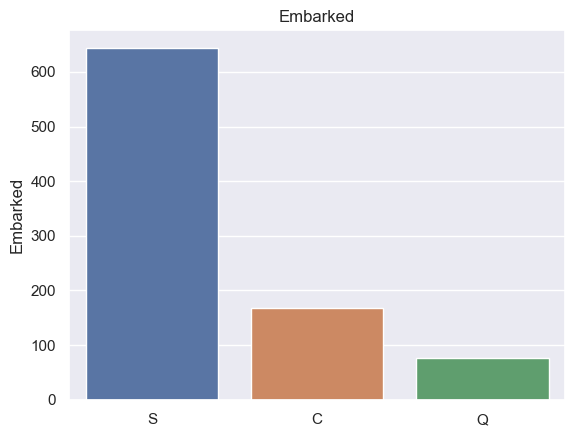

In [180]:
for x in df_cat.columns:
    sns.barplot(df_cat[x].value_counts().index,df_cat[x].value_counts()).set_title(x)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.232543 -0.171485  0.093707
SibSp -0.232543  1.000000  0.414542  0.160887
Parch -0.171485  0.414542  1.000000  0.217532
Fare   0.093707  0.160887  0.217532  1.000000


<AxesSubplot:>

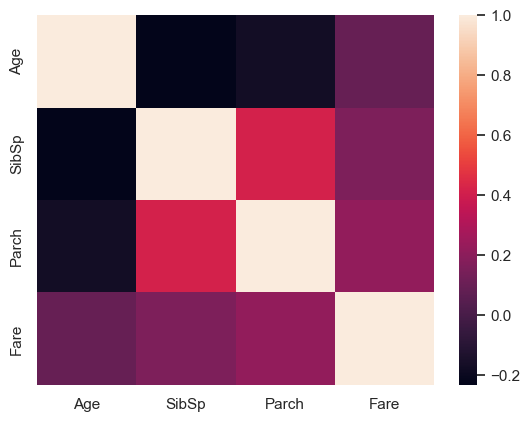

In [181]:
print(df_num.corr())
sns.heatmap(df_num.corr())

          Survived    Pclass       Sex
Survived  1.000000 -0.335549  0.541585
Pclass   -0.335549  1.000000 -0.127741
Sex       0.541585 -0.127741  1.000000


<AxesSubplot:>

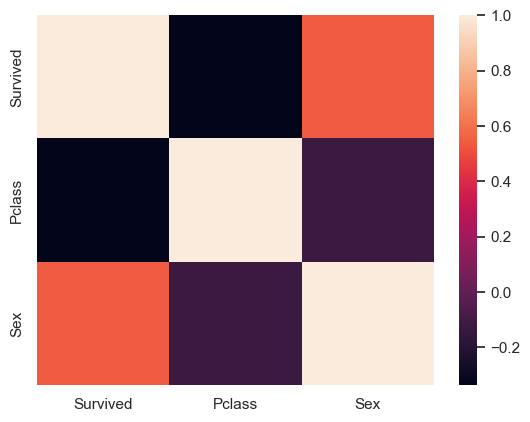

In [182]:
print(df_cat.corr())
sns.heatmap(df_cat.corr())

In [183]:
one_hot_cols = df_cat.columns.tolist()
one_hot_cols.remove('Survived')
df_cat_enc = pd.get_dummies(df_cat, columns=one_hot_cols)

df_cat_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,1
1,1,1,0,0,0,1,1,0,0
2,1,0,0,1,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1
4,0,0,0,1,1,0,0,0,1


In [184]:
df_combined = pd.concat([df_cat_enc,df_num], axis=1)

In [185]:
df_combined.head(15)

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,0,0,1,22.0,1,0,7.2500
1,1,1,0,0,0,1,1,0,0,38.0,1,0,71.2833
2,1,0,0,1,0,1,0,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,0,0,1,35.0,0,0,8.0500
5,0,0,0,1,1,0,0,1,0,28.0,0,0,8.4583
6,0,1,0,0,1,0,0,0,1,54.0,0,0,51.8625
7,0,0,0,1,1,0,0,0,1,2.0,3,1,21.0750
8,1,0,0,1,0,1,0,0,1,27.0,0,2,11.1333
9,1,0,1,0,0,1,1,0,0,14.0,1,0,30.0708


In [186]:
df_combined.dtypes

Survived        int64
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
Sex_0           uint8
Sex_1           uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Age           float64
SibSp           int64
Parch           int64
Fare          float64
dtype: object

## Standardization

In [189]:
df_combined["Fare"] = (df_num["Fare"]-df_num["Fare"].mean())/df_num["Fare"].std()
df_combined["Parch"] = (df_num["Parch"]-df_num["Parch"].mean())/df_num["Parch"].std()
df_combined["SibSp"] = (df_num["SibSp"]-df_num["SibSp"].mean())/df_num["SibSp"].std()

## Scaling

In [190]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df_combined_scaled = df_combined.copy()
df_combined_scaled[['Age','SibSp','Parch','Fare']]= scale.fit_transform(df_combined_scaled[['Age','SibSp','Parch','Fare']])
df_combined_scaled

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,0,0,1,-0.563674,0.431350,-0.474326,-0.500240
1,1,1,0,0,0,1,1,0,0,0.669217,0.431350,-0.474326,0.788947
2,1,0,0,1,0,1,0,0,1,-0.255451,-0.475199,-0.474326,-0.486650
3,1,1,0,0,0,1,0,0,1,0.438050,0.431350,-0.474326,0.422861
4,0,0,0,1,1,0,0,0,1,0.438050,-0.475199,-0.474326,-0.484133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1,-0.178396,-0.475199,-0.474326,-0.384475
887,1,1,0,0,0,1,0,0,1,-0.794841,-0.475199,-0.474326,-0.042213
888,0,0,0,1,0,1,0,0,1,-0.101340,0.431350,2.006119,-0.174084
889,1,1,0,0,1,0,1,0,0,-0.255451,-0.475199,-0.474326,-0.042213


In [191]:
selected_df = df_combined_scaled

In [192]:
selected_df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,0,0,1,-0.563674,0.431350,-0.474326,-0.500240
1,1,1,0,0,0,1,1,0,0,0.669217,0.431350,-0.474326,0.788947
2,1,0,0,1,0,1,0,0,1,-0.255451,-0.475199,-0.474326,-0.486650
3,1,1,0,0,0,1,0,0,1,0.438050,0.431350,-0.474326,0.422861
4,0,0,0,1,1,0,0,0,1,0.438050,-0.475199,-0.474326,-0.484133


In [193]:
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived 

X_train.shape

(889, 12)

In [194]:
y_train.shape

(889,)

## Machine Learning Models

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Gaussian

In [196]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73595506 0.78089888 0.78651685 0.79775281 0.81355932]
0.7829365835079033


### Logistic Reggression

In [197]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.78651685 0.78651685 0.78651685 0.76966292 0.83050847]
0.7919443915444677


### Decision Tree Classifier

In [198]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.79213483 0.74157303 0.80225989]
0.7806766965022536


### KNeighbors Classifer

In [199]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.75842697 0.83146067 0.8258427  0.82485876]
0.8065447851202945


/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mehmetkizilaslan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

### Random Forest Classifier

In [200]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.79775281 0.85955056 0.7752809  0.81920904]
0.8042912461118517


### SVC

In [201]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.82022472 0.80898876 0.81460674 0.85875706]
0.8256839966990415


### Voting Classifier

In [202]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [203]:

#### Cross Validation Score 

cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.79775281 0.79775281 0.79775281 0.83050847]
0.8087983241287373


## Preparing the Test Data

In [204]:
test_updated.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [205]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test_updated['Embarked'], 
                                       prefix='Embarked')

test_sex_one_hot = pd.get_dummies(test_updated['Sex'], 
                                prefix='Sex')

test_plcass_one_hot = pd.get_dummies(test_updated['Pclass'], 
                                   prefix='Pclass')

In [206]:
# Combine the test one hot encoded columns with test
test_updated = pd.concat([test_updated, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [207]:

test_updated.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,3,0,34.5,0,0,7.8292,Q,0,1,0,1,0,0,0,1
1,3,1,47.0,1,0,7.0000,S,0,0,1,0,1,0,0,1
2,2,1,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,3,1,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,3,0,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


In [208]:
test_updated.drop(columns=["Pclass", "Sex", "Embarked"])

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,27.0,0,0,8.0500,0,0,1,1,0,0,0,1
414,39.0,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.5,0,0,7.2500,0,0,1,0,1,0,0,1
416,27.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [209]:
X_train.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [210]:
test_updated = test_updated[['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age', 'SibSp', 'Parch', 'Fare']]

### Standardization

In [212]:
test_updated["Fare"] = (test_updated["Fare"]-test_updated["Fare"].mean())/test_updated["Fare"].std()
test_updated["Parch"] = (test_updated["Parch"]-test_updated["Parch"].mean())/test_updated["Parch"].std()
test_updated["SibSp"] = (test_updated["SibSp"]-test_updated["SibSp"].mean())/test_updated["SibSp"].std()

### Scaling the Test data

In [215]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
test_final = test_updated.copy()
test_final[['Age','SibSp','Parch','Fare']]= scale.fit_transform(test_final[['Age','SibSp','Parch','Fare']])

test_final.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Age,SibSp,Parch,Fare
0,0,0,1,1,0,0,1,0,0.386231,-0.499470,-0.400248,-0.497413
1,0,0,1,0,1,0,0,1,1.371370,0.616992,-0.400248,-0.512278
2,0,1,0,0,1,0,1,0,2.553537,-0.499470,-0.400248,-0.464100
3,0,0,1,0,1,0,0,1,-0.204852,-0.499470,-0.400248,-0.482475
4,0,0,1,1,0,0,0,1,-0.598908,0.616992,0.619896,-0.417492


In [216]:
test_updated.isnull().sum()


Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_0         0
Sex_1         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [217]:
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(test_updated).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

In [218]:
base_submission.to_csv('base_submission.csv', index=False)